In [ ]:
import pandas as pd                                   #library 
from sklearn.tree import DecisionTreeClassifier       
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
col_names = ['Department', 'Status', 'Usia', 'Gaji']  #memuat data dari .csv yang dibuat berdasarkan data di web
# load dataset
data = pd.read_csv("karyawan.csv", header=None, names=col_names)
data.head() #tampilan data saat dirun

,Department,Status,Usia,Gaji
0,Sales,Senior,31...35,46k...50k
1,Sales,Junior,26...30,26k...30k
2,Sales,Junior,31...35,31k...35k
3,Systems,Junior,21...25,46k...50k
4,Systems,Senior,31...35,66k...70k


In [ ]:
feature_cols = ['Department', 'Usia', 'Gaji'] #Seleksi Fitur
X = data[feature_cols]
y = data.Status

In [ ]:
# Encode categorical data to numerical

## Encode features
X['Department'] = pd.get_dummies(X['Department']) # Data nominal -> one hot encoding
X['Usia'].replace(sorted(data['Usia'].unique()), [n for n in range(data['Usia'].nunique())], inplace=True) # Data ordinal -> ordinal encoding
X['Gaji'].replace(sorted(data['Gaji'].unique()), [n for n in range(data['Gaji'].nunique())], inplace=True) # Data ordinal -> ordinal encoding

## Encode label
y.replace({'junior': 0, 'senior': 1}, inplace=True)

In [ ]:
# Memisahkan Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier() 

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Check accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.75


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


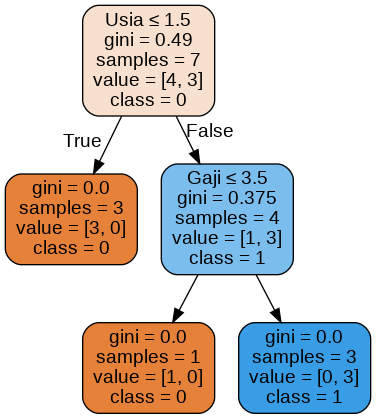

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision-tree.png')
Image(graph.create_png())